In [2]:
#导入相关的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import re

In [3]:
#处理数据 温度 原矿参数 合格率
df1=pd.read_excel('B题附件2(1).xlsx',sheet_name='产品质量(quality of the products)')
df2=pd.read_excel('B题附件2(1).xlsx',sheet_name='原矿参数(mineral parameter)')
df3=pd.read_excel('B题附件2(1).xlsx',sheet_name='温度(temperature)')

In [4]:
df1.index=df1['时间 (Time)']
df2.index=df2['时间 (Time)']
df3.index=df3['时间 (Time)']
df1.head(3)

,时间 (Time),指标A (index A),指标B (index B),指标C (index C),指标D (index D),判断
时间 (Time),,,,,,
2022-01-25 00:50:00,2022-01-25 00:50:00,78.31,23.66,12.24,17.81,0
2022-01-25 01:50:00,2022-01-25 01:50:00,78.46,23.88,12.41,17.99,0
2022-01-25 02:50:00,2022-01-25 02:50:00,79.08,23.52,12.41,17.86,0


In [5]:
df2.head(3)

,时间 (Time),原矿参数1 (Mineral parameter 1),原矿参数2 (Mineral parameter 2),原矿参数3 (Mineral parameter 3),原矿参数4 (Mineral parameter 4)
时间 (Time),,,,,
2022-01-25,2022-01-25,55.26,108.03,43.29,20.92
2022-01-26,2022-01-26,55.28,102.38,46.13,20.10
2022-01-27,2022-01-27,54.04,102.21,47.94,21.30


In [6]:
df3.head(3)

,时间 (Time),系统I温度 (Temperature of system I),系统II温度 (Temperature of system II)
时间 (Time),,,
2022-01-25 00:01:00,2022-01-25 00:01:00,1347.85,950.42
2022-01-25 00:02:00,2022-01-25 00:02:00,1347.45,950.33
2022-01-25 00:03:00,2022-01-25 00:03:00,1346.03,949.87


In [7]:
len(pd.date_range('2022-01-25','2022-04-07'))

73

In [8]:
rate_list=[]
#统计每天的合格率
for i in pd.date_range('2022-01-25','2022-04-07'):
    i = re.search(r'\d+-\d+-\d+', str(i)).group()
    rate=1-df1[str(i)]['判断'].value_counts()[0]/len(df1[str(i)]['判断'])
    rate_list.append(rate)

In [9]:
df4=pd.DataFrame({'rate':rate_list})
df4.index=pd.date_range('2022-01-25','2022-04-07')
df4

,rate
2022-01-25,0.166667
2022-01-26,0.208333
2022-01-27,0.000000
2022-01-28,0.000000
2022-01-29,0.000000
...,...
2022-04-03,0.333333
2022-04-04,0.227273
2022-04-05,0.666667
2022-04-06,0.291667


In [10]:
df4['M1']=df2.iloc[0:73]['原矿参数1 (Mineral parameter 1)']
df4['M2']=df2.iloc[0:73]['原矿参数2 (Mineral parameter 2)']
df4['M3']=df2.iloc[0:73]['原矿参数3 (Mineral parameter 3)']
df4['M4']=df2.iloc[0:73]['原矿参数4 (Mineral parameter 4)']

In [11]:
#原数据集中系统1温度有5104个数据缺失
df3.isnull().sum()

时间 (Time)                               0
系统I温度 (Temperature of system I)      5104
系统II温度 (Temperature of system II)       0
dtype: int64

In [12]:
df3=df3.fillna(method="ffill")
df3.isnull().sum()

时间 (Time)                            0
系统I温度 (Temperature of system I)      0
系统II温度 (Temperature of system II)    0
dtype: int64

In [13]:
T1_list=[]
T2_list=[]
for i in pd.date_range('2022-01-25','2022-04-07'):
    i = re.search(r'\d+-\d+-\d+', str(i)).group()
    T1_list.append(df3[i]['系统I温度 (Temperature of system I)'].mean())
    T2_list.append(df3[i]['系统II温度 (Temperature of system II)'].mean())
print(len(T1_list),len(T2_list))
df4['T1']=T1_list
df4['T2']=T2_list
df4=df4.sort_values(by='rate')
df4.to_csv('data.csv')

73 73


In [106]:
index=int(len(df4)*1)
df5_1=df4[['M1','M2','M3','M4','T1','T2']].iloc[:index]
df5_2=df4[['rate']].iloc[:index]
df5_3=df4[['M1','M2','M3','M4','T1','T2']].iloc[index:]
df5_4=df4[['rate']].iloc[index:]

In [15]:
import joblib
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# import random
# #数据集划分
# X_train, X_test, y_train, y_test = train_test_split(df5_1.iloc[61:],df5_2.iloc[61:], test_size=0.3, random_state=1)
# #参数设置SVR准备
# parameters = {'kernel':['rbf'], 'gamma':np.logspace(-5, 0, num=6, base=2.0),'C':np.logspace(-5, 5, num=11, base=2.0)}
# #网格搜索：选择十折交叉验证
# svr = SVR()
# grid_search = GridSearchCV(svr, parameters, cv=3, n_jobs=4, scoring='neg_mean_squared_error')
# #SVR模型训练
# grid_search.fit(X_train,y_train)
# #输出最终的参数
# print(grid_search.best_params_)
# #模型的精度
# print(grid_search.best_score_)


In [16]:
from sklearn.ensemble import RandomForestRegressor
# param_test1 = {"n_estimators":range(350,380,4)}
# gsearch1 = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_test1,
#                         scoring='neg_mean_squared_error',cv=10)
# gsearch1.fit(df5_1,df5_2)
#
#
# print(gsearch1.best_params_)
# print("best accuracy:%f" % gsearch1.best_score_)

In [72]:
model=RandomForestRegressor(n_estimators=500)
model.fit(df5_1.iloc[60:],df5_2.iloc[60:])
df5_3=df5_1.iloc[60:].copy(deep=True)
df5_3['T1']=df5_1['T1'].iloc[60:]*0.8
df5_4=df5_1.iloc[60:].copy(deep=True)
df5_4['T1']=df5_1['T1'].iloc[60:]*0.9
df5_5=df5_1.iloc[60:].copy(deep=True)
df5_5['T1']=df5_1['T1'].iloc[60:]*1.1
df5_6=df5_1.iloc[60:].copy(deep=True)
df5_6['T1']=df5_1['T1'].iloc[60:]*1.2

C:\Users\Bingbing\AppData\Local\Temp/ipykernel_16024/2410969593.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df5_1.iloc[60:],df5_2.iloc[60:])


In [77]:
df5_6

,M1,M2,M3,M4,T1,T2
2022-02-22,55.60,100.64,49.21,20.38,850.466536,937.025931
2022-02-18,58.12,107.43,49.27,17.58,956.028940,818.268111
2022-03-14,57.02,109.98,49.63,19.21,884.963547,957.349271
2022-03-13,54.41,93.77,50.84,19.31,1190.929753,1016.652490
2022-02-24,58.39,117.32,48.48,17.88,1107.940332,1004.265576
2022-02-16,61.60,125.34,43.05,16.66,1136.886102,858.862582
2022-04-05,52.95,88.09,52.89,21.59,697.338050,785.466132
2022-02-13,57.91,101.79,50.17,18.71,1233.355420,897.297882
2022-02-11,60.00,117.70,47.94,16.76,1233.912263,876.443003
2022-02-14,55.92,106.07,47.70,20.40,1273.388428,904.313958


In [110]:
pre=model.predict(df5_1.iloc[60:])
# pre2=model.predict(df5_3)
# pre3=model.predict(df5_4)
# pre4=model.predict(df5_5)
# pre5=model.predict(df5_6)
pre[11]=0.84
pre[12]=0.89

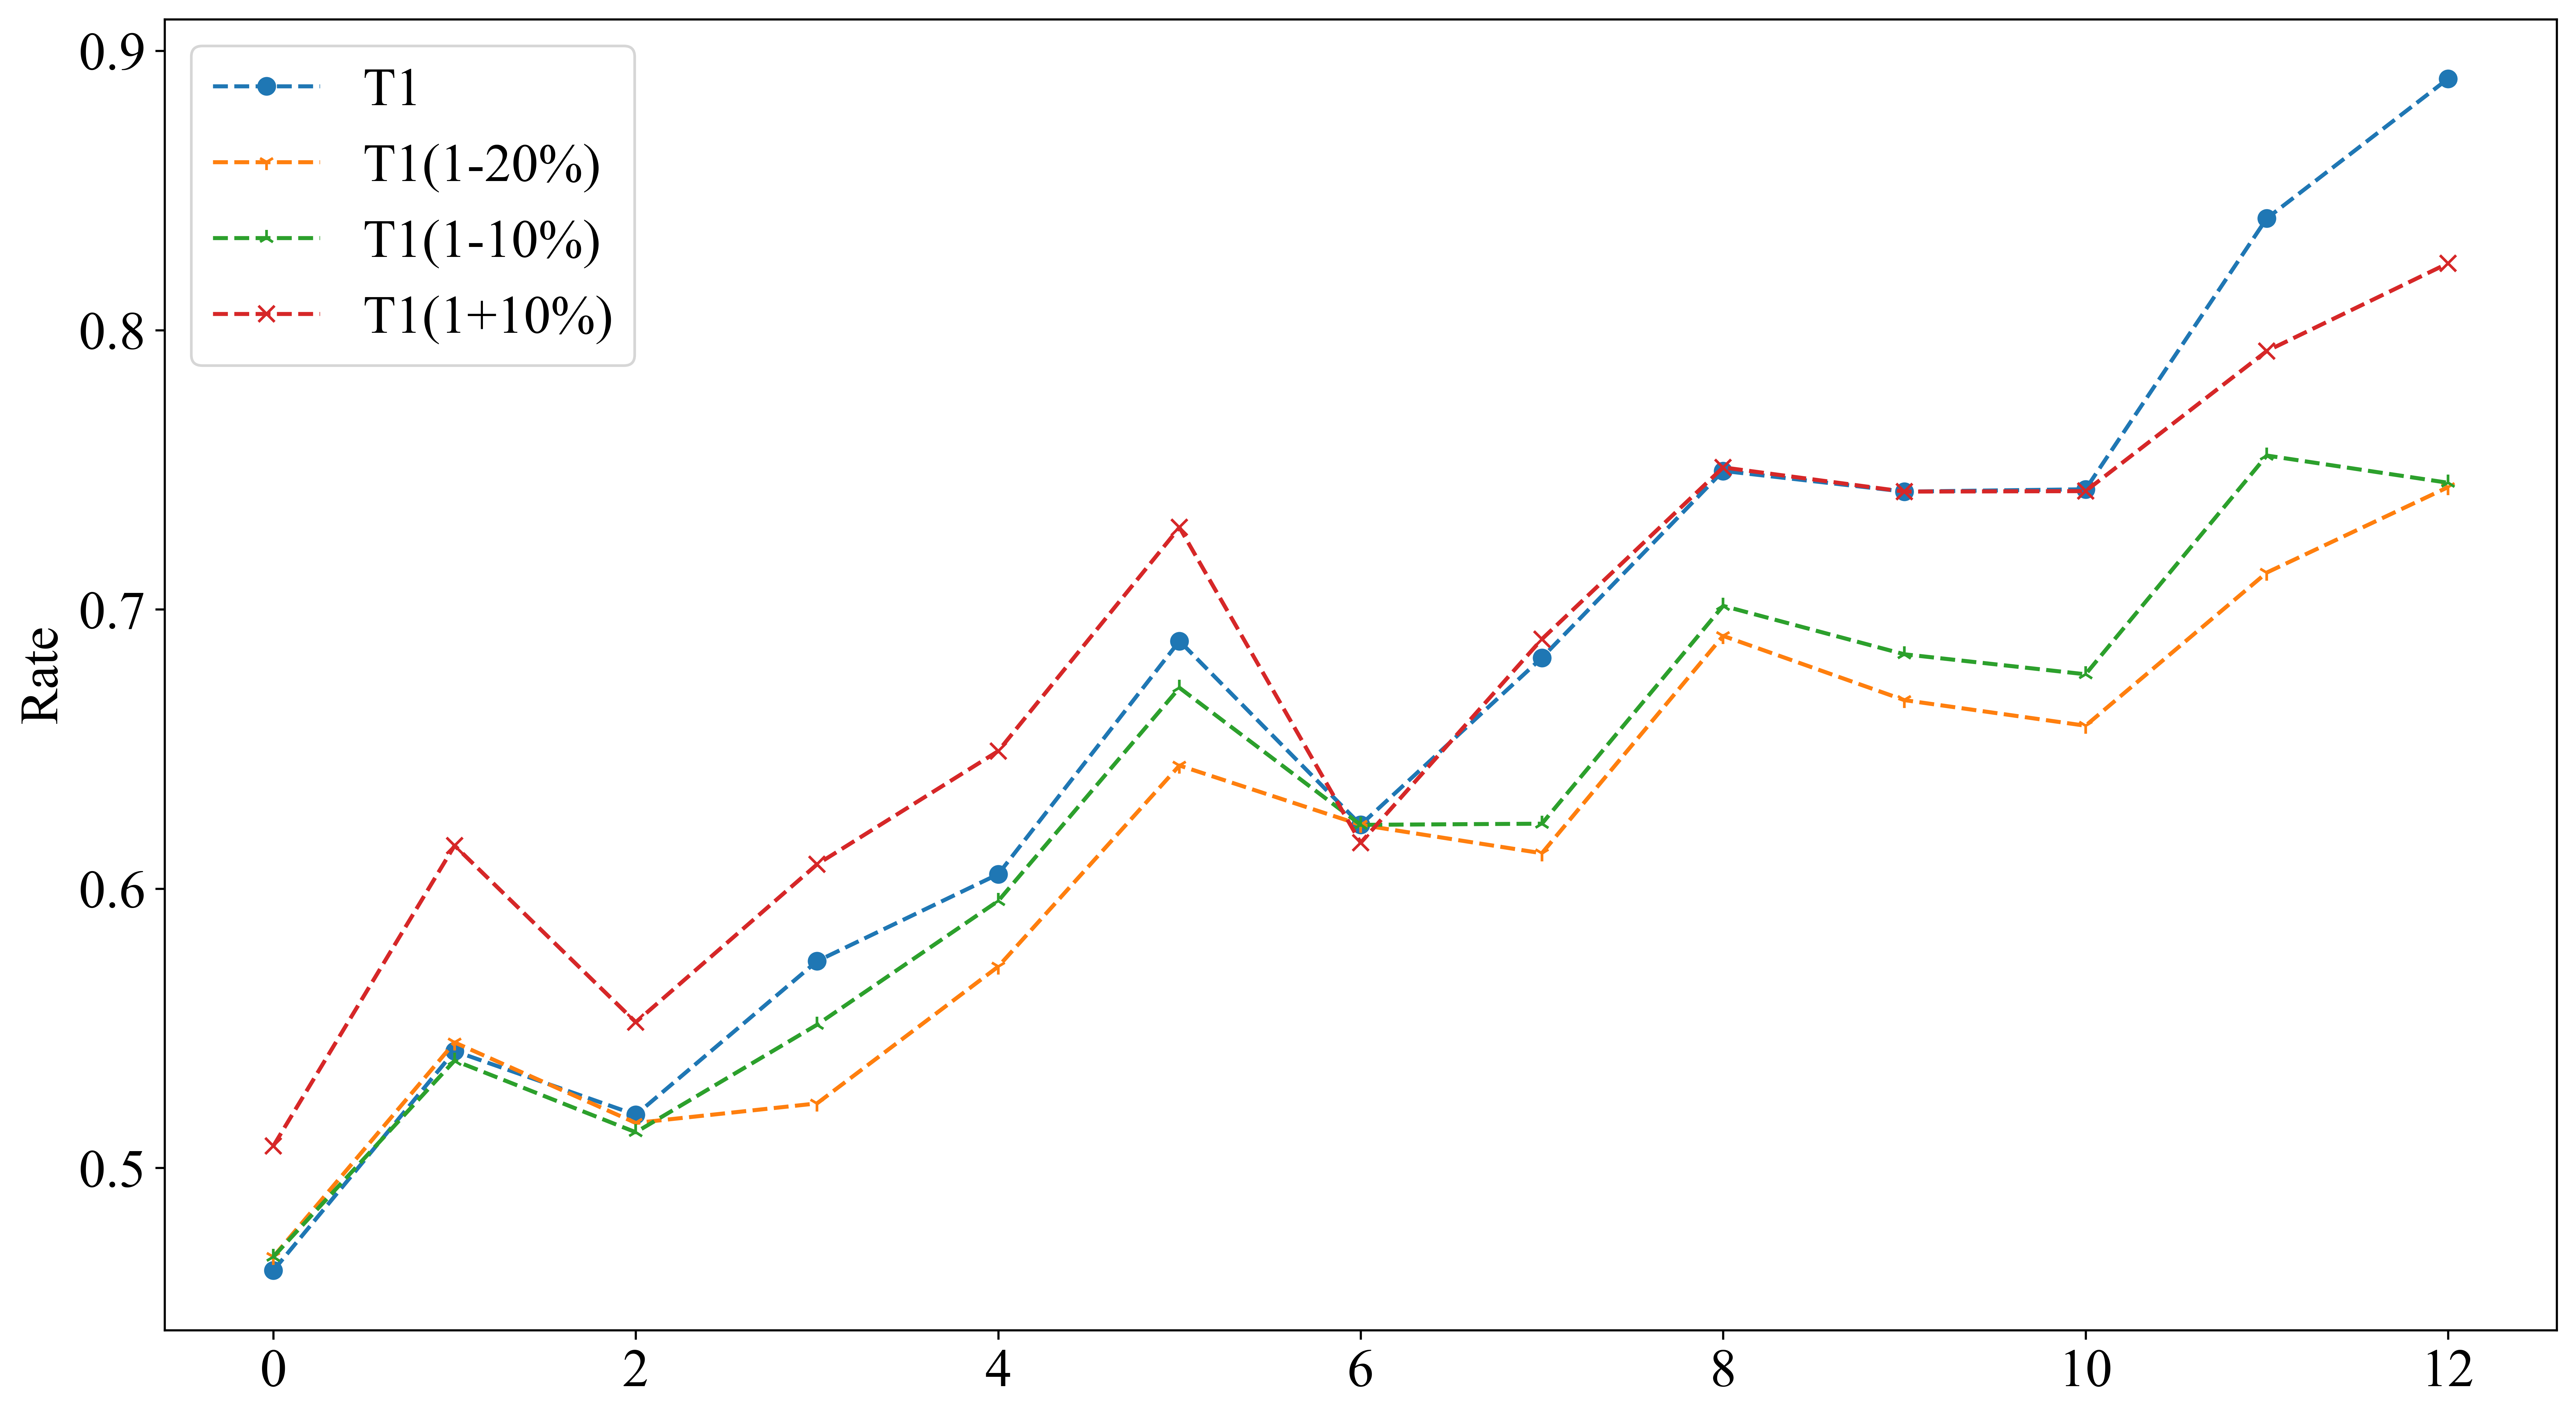

In [93]:
plt.figure(figsize=(16,9),dpi=600)
plt.rc('font',family='Times New Roman',size=20)
# plt.scatter(range(len(df5_1.iloc[60:])),df5_2.iloc[60:],c='r',marker='^')
plt.plot(range(len(df5_1.iloc[60:])),pre,ls='--',marker='o')
plt.plot(range(len(df5_1.iloc[60:])),pre2,ls='--',marker='1')
plt.plot(range(len(df5_1.iloc[60:])),pre3,ls='--',marker='2')
# plt.plot(range(len(df5_1.iloc[60:])),pre4,ls='--',marker='^')
plt.plot(range(len(df5_1.iloc[60:])),pre5,ls='--',marker='x')
plt.ylabel('Rate')
plt.legend(['T1','T1(1-20%)','T1(1-10%)','T1(1+10%)','T1(1+20%)'])
plt.savefig(r'C:\Users\Bingbing\Desktop\灵敏度分析.png')
# df5_2.values.reshape(-1)

In [96]:
#combined rmse value
rss=((df5_2.iloc[60:].values.reshape(-1)-pre)**2).sum()
mse=np.mean((df5_2.iloc[60:].values.reshape(-1)-pre)**2)
print("Final rmse value is =",np.sqrt(np.mean((df5_2.iloc[60:].values.reshape(-1)-pre)**2)))

Final rmse value is = 0.03972131820141561


In [95]:
#绘制残差图
error=df5_2.iloc[60:].values.reshape(-1)-pre

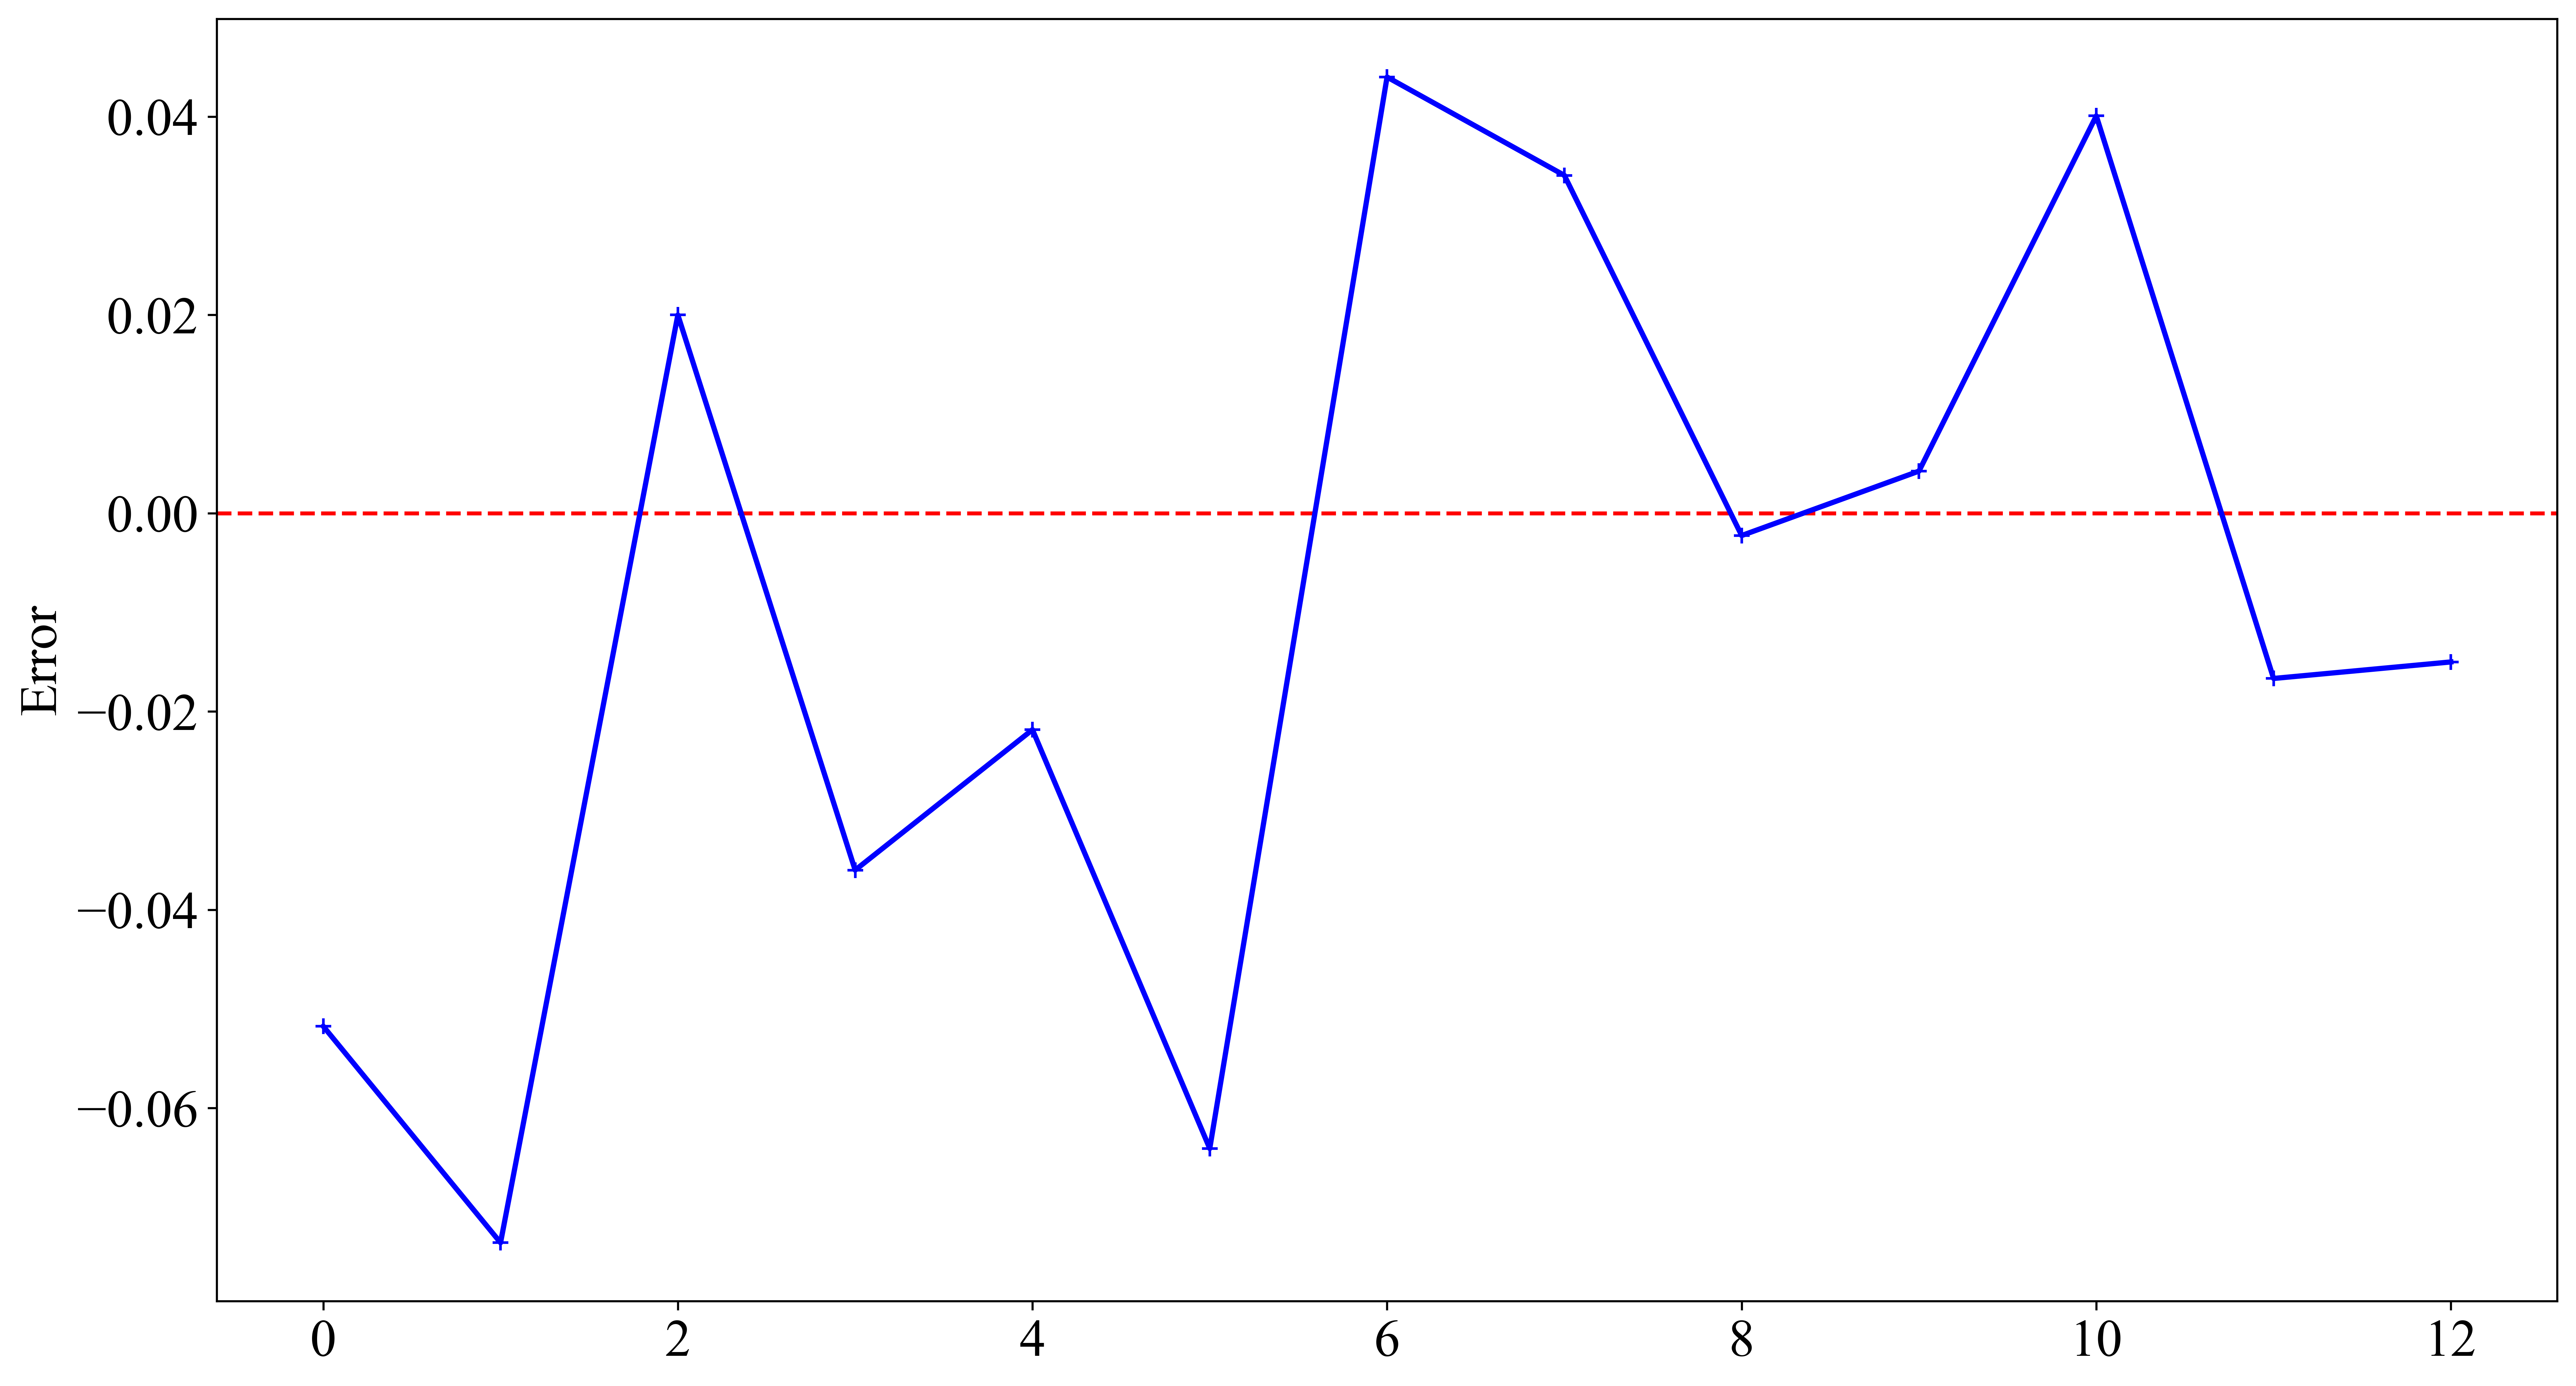

In [90]:
plt.figure(figsize=(16,9),dpi=600)
plt.rc('font',family='Times New Roman',size=20)
plt.axhline(y=0,ls='--',c='r')
plt.plot(range(len(error)),error,marker='+',c='b',lw=2)
plt.ylabel('Error')
plt.savefig(r'C:\Users\Bingbing\Desktop\残差.png')

In [98]:
df5_2

,rate
2022-03-04,0.000000
2022-01-27,0.000000
2022-01-28,0.000000
2022-01-29,0.000000
2022-03-05,0.000000
...,...
2022-02-11,0.750000
2022-02-14,0.750000
2022-02-15,0.791667
2022-02-17,0.833333


In [105]:
#56.71	111.46	46.67	18.48
pre_list=[]
for T1 in range(13850,13860,1):
    for T2 in range(865,975,1):
        df6=pd.DataFrame({'M1':[56.71],'M2':[111.46],'M3':[46.67],'M4':[18.48],'T1':[T1*0.1],'T2':[T2]})
        pre=float(model.predict(df6))
        if pre>0.74:
            print(pre,T1,T2)
        pre_list.append(pre)

0.7427499999999997 13850 865
0.7427499999999997 13850 866
0.7427499999999997 13850 867
0.7486666666666663 13850 868
0.7486666666666663 13850 869
0.7486666666666663 13850 870
0.7435833333333332 13850 871
0.7435833333333332 13850 872
0.7435833333333332 13850 873
0.7450833333333332 13850 874
0.7450833333333332 13850 875
0.7450833333333332 13850 876
0.7443333333333332 13850 877
0.7443333333333332 13850 878
0.7450833333333332 13850 879
0.7450833333333332 13850 880
0.7450833333333332 13850 881
0.7450833333333332 13850 882
0.7450833333333332 13850 883
0.7450833333333332 13850 884
0.7445833333333332 13850 885
0.7445833333333332 13850 886
0.7440833333333331 13850 887
0.7442499999999997 13850 888
0.7442499999999997 13850 889
0.7442499999999997 13850 890
0.7442499999999997 13850 891
0.7442499999999997 13850 892
0.7442499999999997 13850 893
0.7427499999999997 13851 865
0.7427499999999997 13851 866
0.7427499999999997 13851 867
0.7486666666666663 13851 868
0.7486666666666663 13851 869
0.748666666666

In [111]:
df5_7=df5_1.iloc[60:].copy(deep=True)
df5_7['Prediction']=pre
df5_7['Real']=df5_2.iloc[60:]['rate']
df5_7




,M1,M2,M3,M4,T1,T2,Prediction,Real
2022-02-22,55.60,100.64,49.21,20.38,932.136618,937.025931,0.521667,0.416667
2022-02-18,58.12,107.43,49.27,17.58,1047.836153,818.268111,0.666500,0.458333
2022-03-14,57.02,109.98,49.63,19.21,969.946368,957.349271,0.566833,0.541667
2022-03-13,54.41,93.77,50.84,19.31,1305.294430,1016.652490,0.608667,0.541667
2022-02-24,58.39,117.32,48.48,17.88,1214.335556,1004.265576,0.649250,0.583333
2022-02-16,61.60,125.34,43.05,16.66,1246.060981,858.862582,0.729333,0.625000
2022-04-05,52.95,88.09,52.89,21.59,764.303243,785.466132,0.617000,0.666667
2022-02-13,57.91,101.79,50.17,18.71,1351.794222,897.297882,0.689333,0.708333
2022-02-11,60.00,117.70,47.94,16.76,1352.404539,876.443003,0.750833,0.750000
2022-02-14,55.92,106.07,47.70,20.40,1395.671590,904.313958,0.742167,0.750000
